# STAT40800 Final Project
## Author: Sushmitha B - 24209228
For this project I will analyse data based on red and white Portuguese wine. I will use the data sets `winequality-red.csv` and `winequality-white.csv` 

#### Importing all the necessary libraries

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from scipy.stats import f_oneway
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

### Question 1

#### (a) Load the winequality-red.csv dataset into Python as a pandas DataFrame.

In [144]:
red_file_path = 'winequality-red.csv'
winequality_red_df = pd.read_csv(red_file_path, sep=';')

**Details:**

- I have declared the `file_path` variable with the path. Since we assume it to be in the same directory, I give only the file name
- Using `pandas` to read the csv into a dataframe. 

#### (b) Inspect the data. How many wines are included in this dataset? How many different indicators are included? Does this dataset contain any missing values?

In [145]:
#Inspect the data
winequality_red_df.info()  # Check data types and missing values as summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [146]:
#Number of wines
red_num_wines = winequality_red_df.shape[0]
print("The number of entries(wines) included: ",red_num_wines) 

The number of entries(wines) included:  1599


In [147]:
#Number of indicators (including quality)
red_num_columns=winequality_red_df.shape[1]
print("The number of indicators(total columns including quality) provided :",red_num_columns)

The number of indicators(total columns including quality) provided : 12


In [148]:
#Null check
redwine_null=winequality_red_df.isnull().sum().sum()
print("The number of any missing values in any columns: ",redwine_null)

The number of any missing values in any columns:  0


**Details:**
 
 - I have used `info` command to provide a summary of the structure of the data set. This command will return the number of records, column names, data types, and the number of non-null values in each column. This allows you to quickly analyze the structure of the data.
 - From the documentation we know that the column quality is a `dependent variable`.
 - Next, to answer the questions asked, each question is answered using a `shape` and `print` statement including `number of wines` , `number of indicators` and `missing values` if any.
 - Note that for total number of indicators, I have included the column `quality` and displayed. Without the column quality, the number of indicators are `11`.

**Interpretation:**

There are `1599 entries(wines)` for the red wine data set. There are `11 variables` which predict the quality of the wine. Some major variables include `pH, alcohol and residual sugar`. There are no missing values.

#### (C) Perform an exploratory data analysis, creating both numerical and graphical summaries of the data. Discuss and interpret your results..

In [149]:
#Numerical Summary
winequality_red_df.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


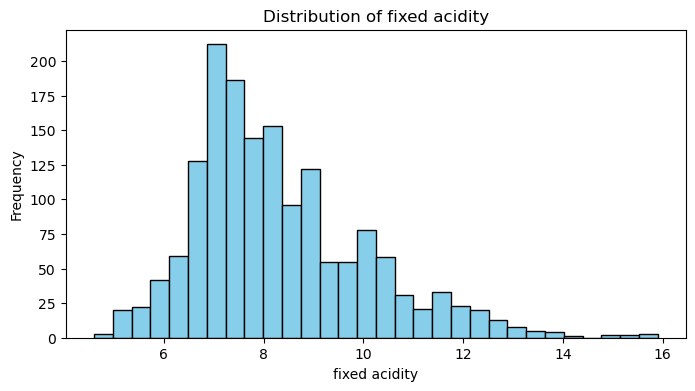

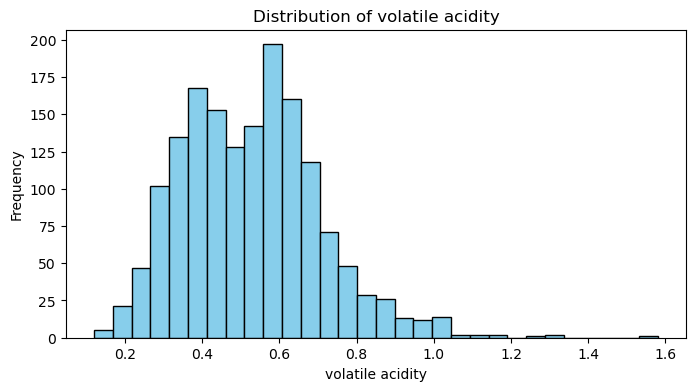

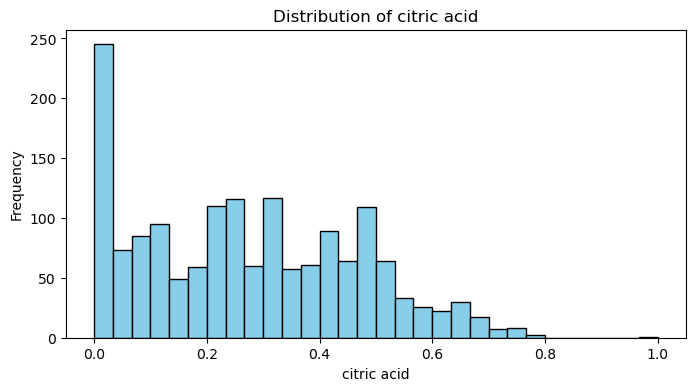

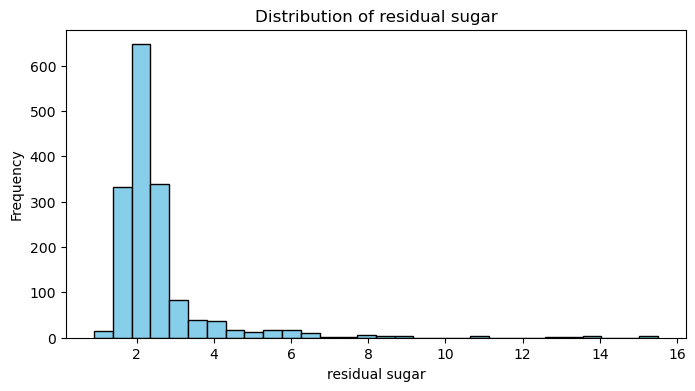

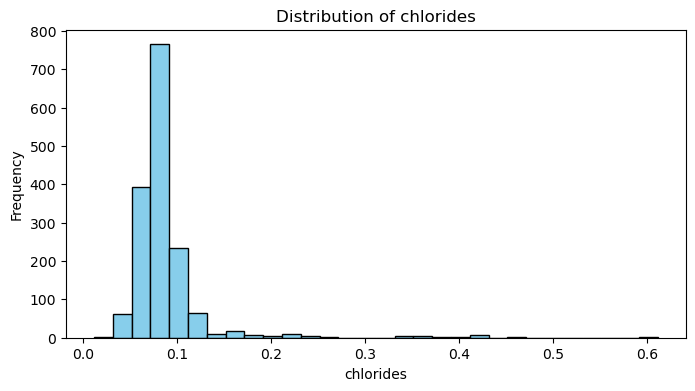

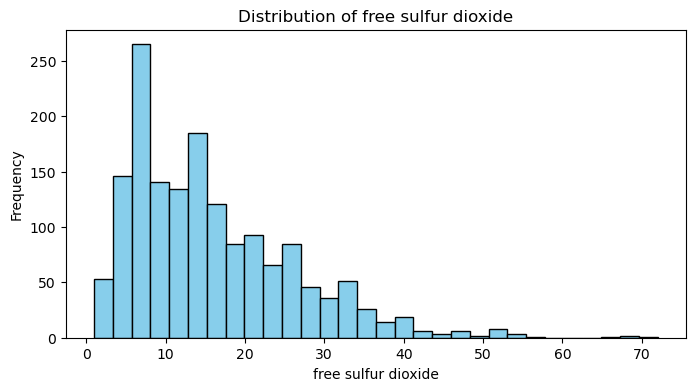

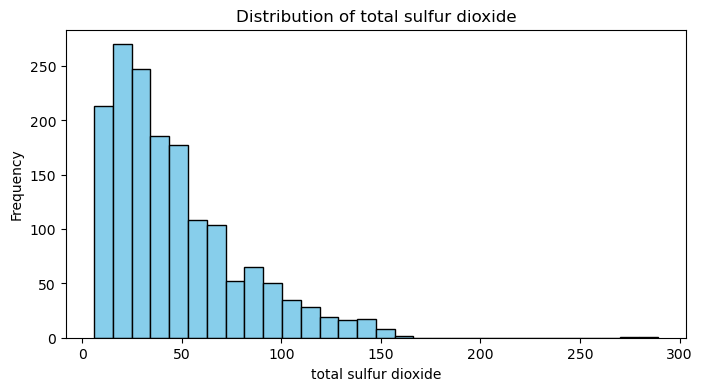

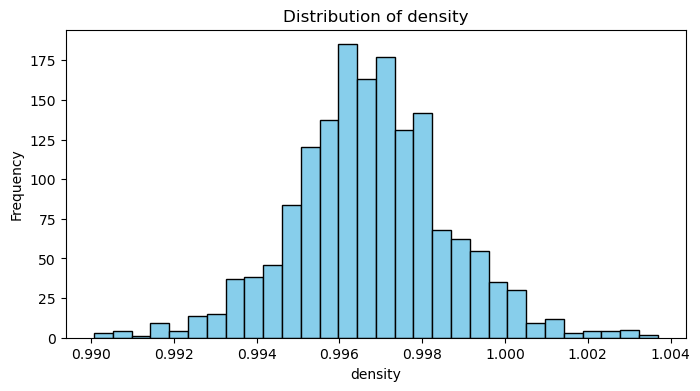

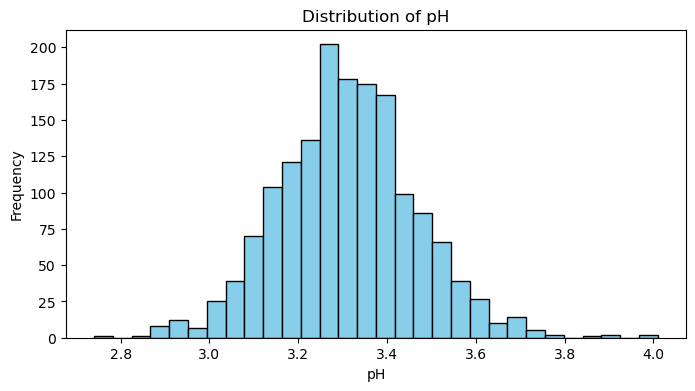

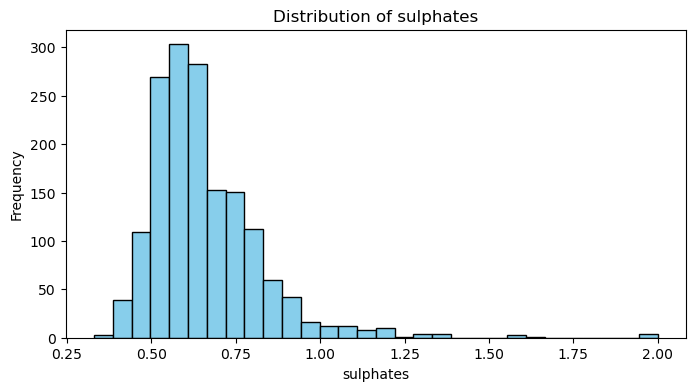

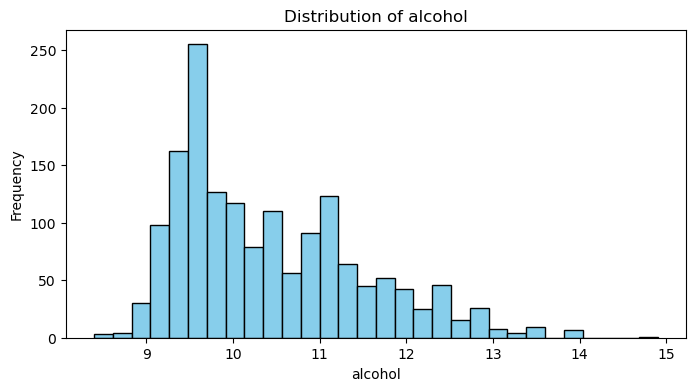

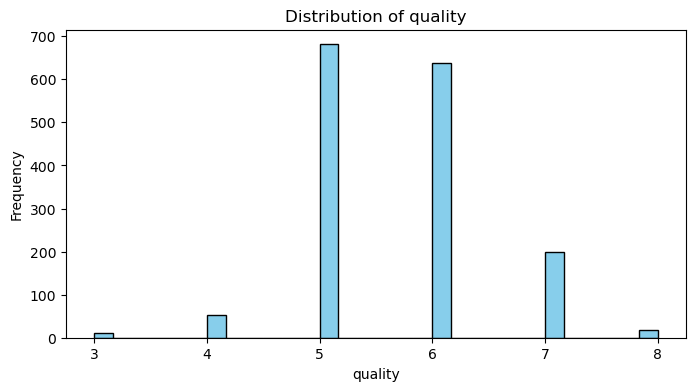

In [150]:
# Histograms for each variable
def plot_histograms(df):
 for col in df.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    
plot_histograms(winequality_red_df)

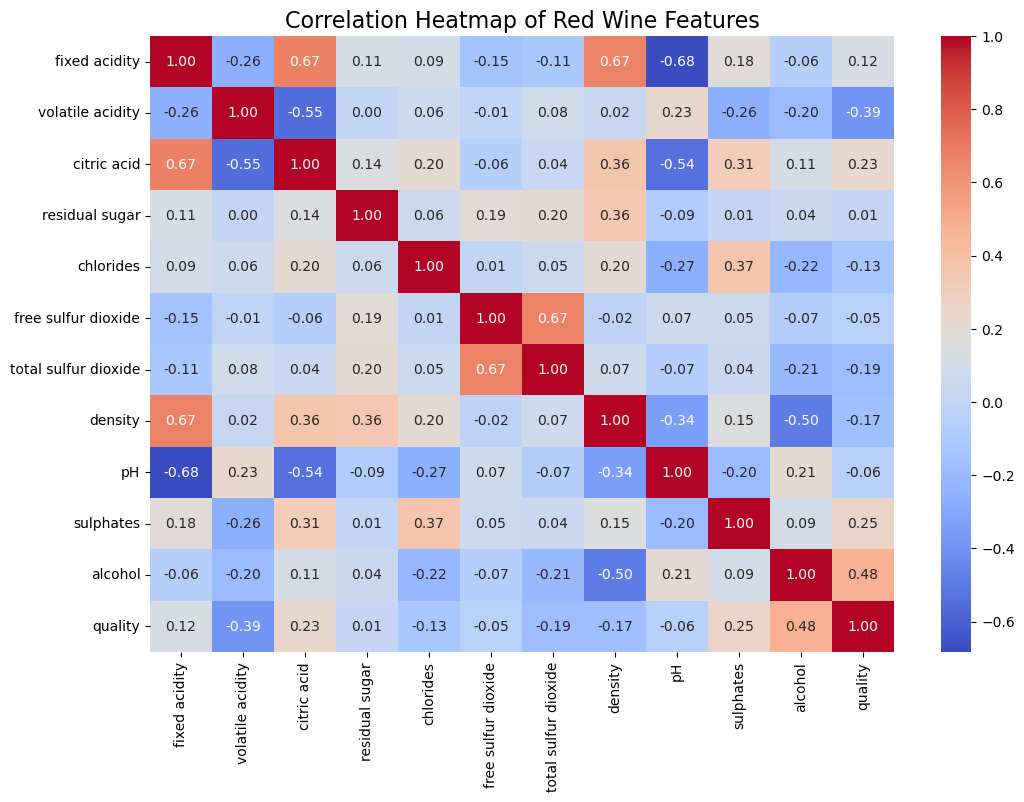

In [151]:
#Correlation between each variable
def plot_correlation_heatmap(df, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(title, fontsize=16)
    plt.show()

plot_correlation_heatmap(winequality_red_df, "Correlation Heatmap of Red Wine Features")

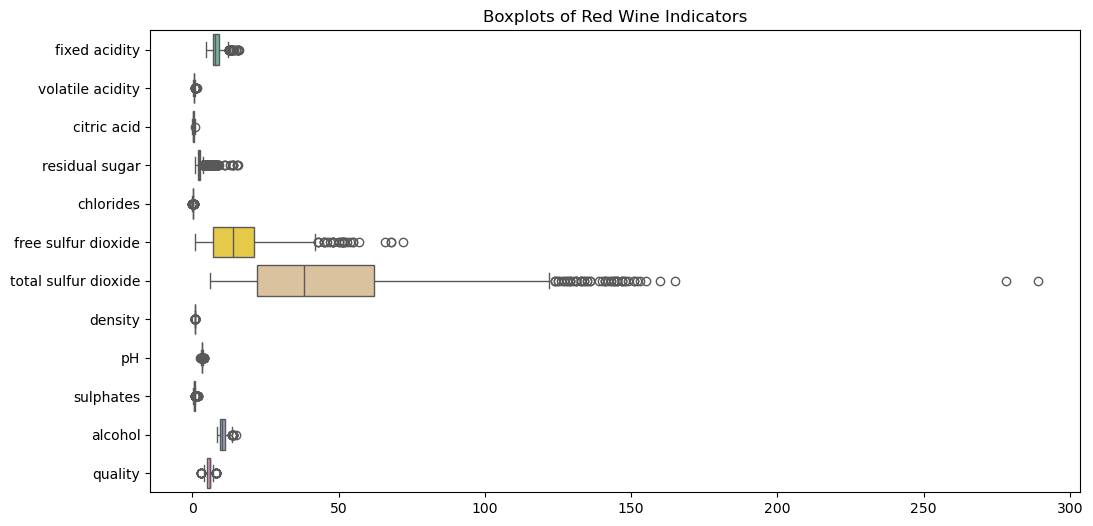

In [152]:
#Box plot for identifying outliers in variables
def plot_boxplot(df, title):
 plt.figure(figsize=(12, 6))
 sns.boxplot(data=df, orient="h", palette="Set2")
 plt.title(title)
 plt.show()

plot_boxplot(winequality_red_df,"Boxplots of Red Wine Indicators")    

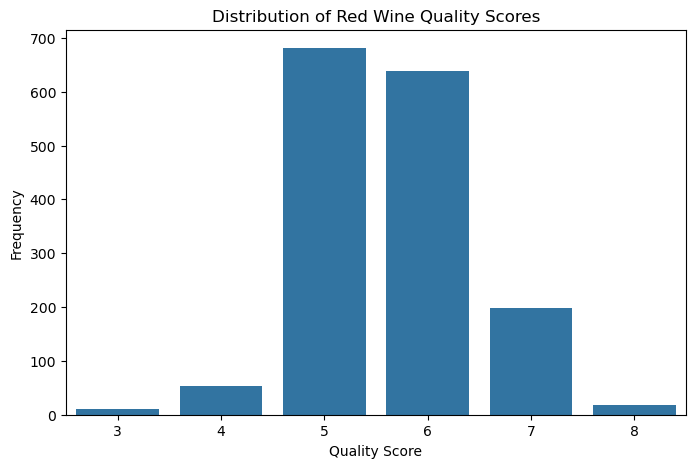

In [153]:
# Distribution of quality score with bar graph
def plot_bargraph(df,title):
    plt.figure(figsize=(8, 5))
    sns.countplot(x="quality", data=df)
    plt.title(title)
    plt.xlabel("Quality Score")
    plt.ylabel("Frequency")
    plt.show()
    
plot_bargraph(winequality_red_df,"Distribution of Red Wine Quality Scores")

**DETAILS:** 

- **Numerical Summary**
  * Used to check the key statistics for each variable in the dataset.
    
- **Histogram**
  * I have used histograms to plot the frequency of indicators for making red wine. 
  * For each variable, the histogram is plotted and is knitted into one whole plot.
    
- **Correlation heatmap**
  * I have used correlation heatmap to show how well the indicators are correlated.
  * Our main aim is to see if correlation between the dependent and predictor variables.
    
- **Boxplot**
  * Used boxplot to identify if any outliers are present in the data.

- **Bar graph**
  * Used bar graph to display the frequency of the quality scores
 
**INTERPRETATION:**

- **Numerical Summary**
    There are many parameters to discuss upon in this summary but I will explain 3 main parameters in this.
  - **Alcohol content:** There is a mean `10.422983` percent alcohol in this red wine data frame. Maximum goes to 14% and minimum is 8%.
  - **pH:** There is a mean pH of about `3.3` which we know is acidic. The minimum pH is 2.74 and maximuum is 4. So altogether we can say that the red wine is acidic.
  - **Residual sugar:** There is a mean of `2.54 g/L` . Meaning, the majority of wines are dry or mildly sweet, with a minority proportion having extremely high sugar content.

- **Graphical Summary**
  - **Histogram:** Features like density and pH followed relatively normal distributions, while residual sugar and alcohol had a skewed distribution (due to outliers for residual sugar and wide range of alcohol content).
  - **Correlation Heatmap:** Density and residual sugar show a strong positive connection (`0.55`). This means that wines with increased sugar content are denser since sugar increases liquid mass. 
There is a negative connection between density and alcohol `(-0.6`9). Wines with higher alcohol content have a lower density, most likely because alcohol has a lower density than water
  -  **Boxplot:** There are most noted outliers in free and total sulphur dioxide which means its usage has been spiked in some wines.
  -  **Bar graph:** The quality of red wine mostly lies between 5 and 6 with 5 being the highest quality. 

### Question 2

#### (a) Load the winequality-white.csv dataset into Python as a pandas DataFrame.

In [154]:
white_file_path='winequality-white.csv'
winequality_white_df = pd.read_csv(white_file_path, delimiter=';')
winequality_white_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Details:**

- I have declared the `white_file_path` variable with the path. Since we assume it to be in the same directory, I give only the file name.
- Using `pandas` to read the csv into a dataframe.
- Displayed first 5 rows of data to understand the dataset 

#### (b) Inspect the data. How many wines are included in this dataset? Are the indicators the same as those in the red wine group??

In [155]:
#Inspect the data
winequality_white_df.info()  # Check data types and missing values as a summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [156]:
#Display number of wines
white_num_wines=winequality_white_df.shape[0]
print("Given number of wines: ",white_num_wines)

Given number of wines:  4898


In [157]:
#Null check
whitewine_null=winequality_white_df.isnull().sum().sum()
print("The number of any missing values in any columns: ",whitewine_null)

The number of any missing values in any columns:  0


In [158]:
#Number of indicators (including quality)
white_num_columns=winequality_white_df.shape[1]
print("The number of indicators(total columns including quality) provided :",white_num_columns)

The number of indicators(total columns including quality) provided : 12


In [159]:
#Display number of columns and same column check
common_columns = set(winequality_red_df.columns) == set(winequality_white_df.columns)
print("Are all the columns common between both dataframe?: ",common_columns)

Are all the columns common between both dataframe?:  True


**Details:**

 - I have used `info` command to provide a summary of the structure of the data set. This command will return the number of records, column names, data types, and the number of non-null values in each column. This allows you to quickly analyze the structure of the data.
 - From the documentation we know that the column quality is a `dependent variable`.
 - Next, to answer the questions asked, each question is answered using a `shape` and `print` statement including `number of wines` , `number of indicators` and `missing values` if any.
 - Note that for total number of indicators, I have included the column `quality` and displayed. Without the column quality, the number of indicators are `11`.
 - Additionally, we have checked if the columns in red wine data set and white wine data set are the same.

**Interpretation:**

There are `4898 entries(wines)` for the red wine data set. There are `11 variables` which predict the quality of the wine. Some major variables include `pH, alcohol and residual sugar`. There are `no missing values`. The columns(indicators) between red wine data set and white wine data set are the `same` .

#### (c) Perform a t-test, for each of the measurements, to test whether any of the indicators differ between the red and the white groups. Use a significance level of α = 0.01. Display the t-score and p-value for each measurement. Clearly state the conclusion of your tests and explain your reasoning.

In [160]:
# Perform t-test for each indicator
ttest_results = {}

for column in winequality_red_df.columns: 
 
    if column != 'quality':  # skip the quality column
        red_values = winequality_red_df[column]
        white_values = winequality_white_df[column]
        t_stat, p_val = ttest_ind(red_values, white_values)
        ttest_results[column] = {'t-statistic': t_stat, 'p-value': p_val}

ttest_results_df = pd.DataFrame(ttest_results).T #Transposing for better visibility
# Display t-test results
ttest_results_df 

,t-statistic,p-value
fixed acidity,44.905568,0.000000e+00
volatile acidity,69.493288,0.000000e+00
citric acid,-15.374954,2.003736e-52
residual sugar,-29.996105,2.959354e-185
chlorides,48.123066,0.000000e+00
free sulfur dioxide,-43.106106,0.000000e+00
total sulfur dioxide,-79.074620,0.000000e+00
density,34.200223,7.319605e-236
pH,28.090026,5.923308e-164
sulphates,44.963402,0.000000e+00


In [161]:
# Conclusion: For each measurement, compare the p-value with the significance level (alpha=0.01)
alpha = 0.01
#Conduct hypothesis testing
ttest_results_df['Conclusion'] = ttest_results_df['p-value'].apply(
    lambda p: 'Reject H0' if p < alpha else 'Fail to Reject H0'
)
#Print results
print(ttest_results_df)

                      t-statistic        p-value Conclusion
fixed acidity           44.905568   0.000000e+00  Reject H0
volatile acidity        69.493288   0.000000e+00  Reject H0
citric acid            -15.374954   2.003736e-52  Reject H0
residual sugar         -29.996105  2.959354e-185  Reject H0
chlorides               48.123066   0.000000e+00  Reject H0
free sulfur dioxide    -43.106106   0.000000e+00  Reject H0
total sulfur dioxide   -79.074620   0.000000e+00  Reject H0
density                 34.200223  7.319605e-236  Reject H0
pH                      28.090026  5.923308e-164  Reject H0
sulphates               44.963402   0.000000e+00  Reject H0
alcohol                 -2.658513   7.867874e-03  Reject H0


**Details:**

- We perform t tests for each column between red and white wine data and store the results ( t statstic and p value) for each column in a data frame.
- Next we perform hypothesis testing with given alpha = 0.01 to either reject the null hypothesis or not reject null hypothesis H0. and print the results as the same data frame with the conclusion column added to it.
- The null hypothesis (H0): It states that there is no significant difference in the mean value of the indicator between red and white wine groups.
- 
Alternative hypothesis (H1): "Red and white wine groups have significantly different mean values for the indicator."

**Interpretaion:**
 
   Every p value is `less than the given alpha 0.01`, therefore null hypothesis(H0) for all the columns are `rejected`. There were statistically significant variations in characteristics such as density, volatile acidity, and chlorides (p-values < 0.01). Alcohol, pH and residual showed a t-statistic of -2.66, 28.09 and -29.996  with p-value of 0.0079,5.923308e-164 and 2.959354e-185. 

#### (d) Compare the two datasets using graphical means


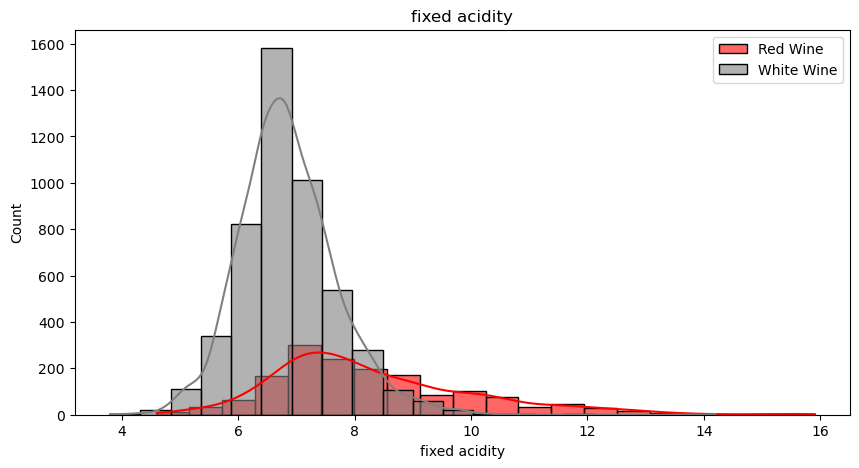

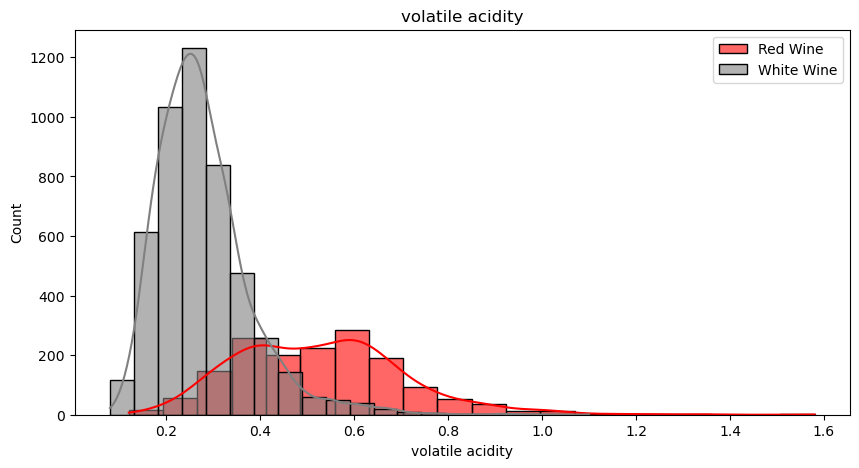

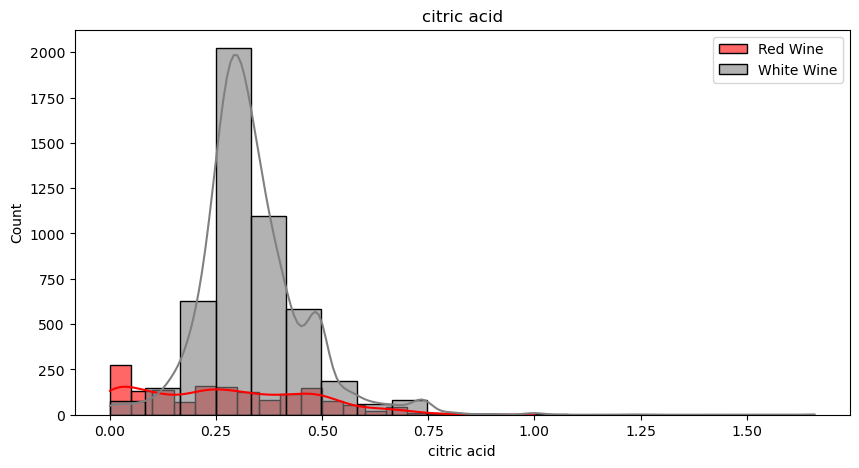

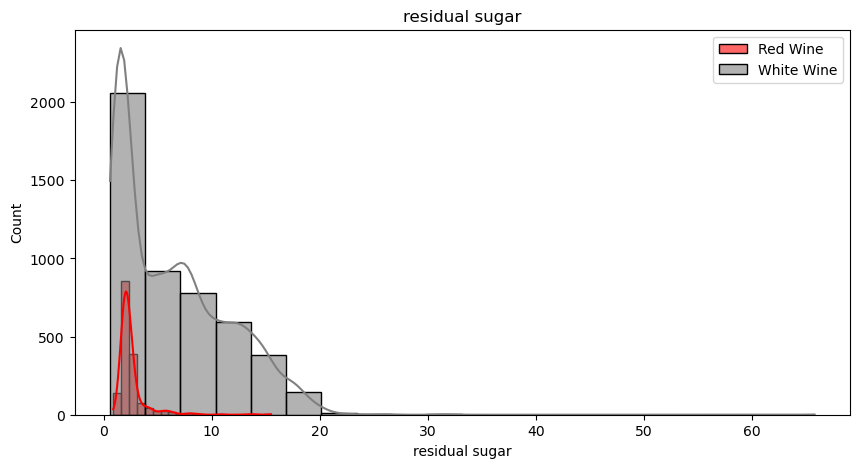

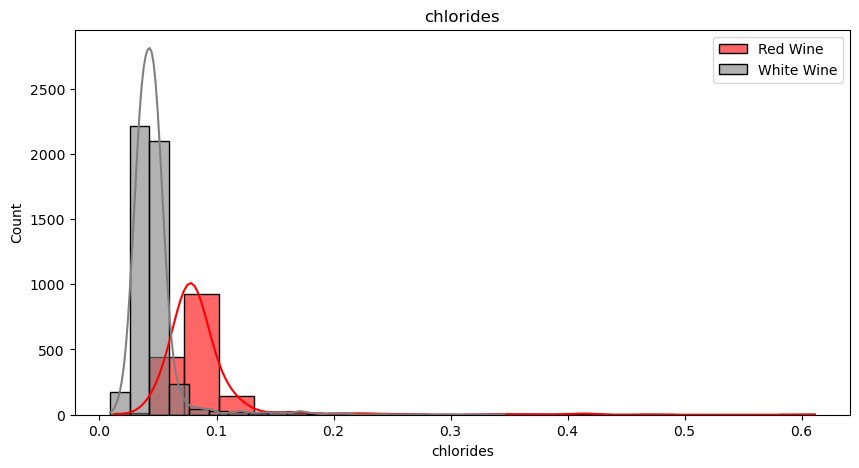

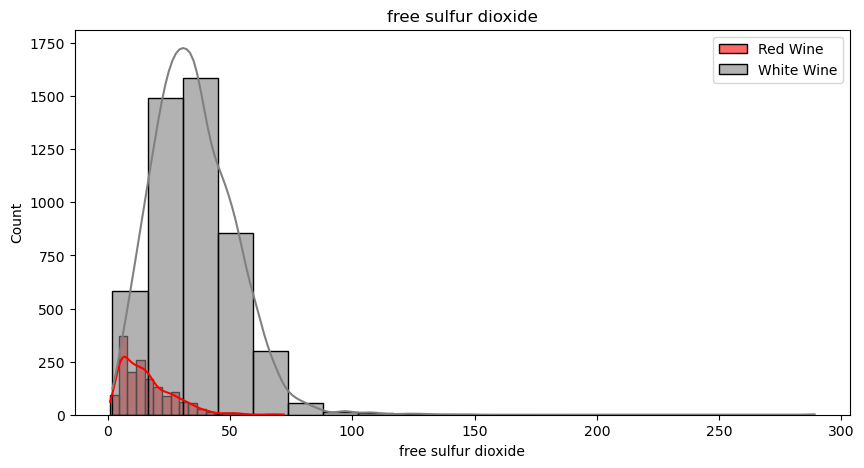

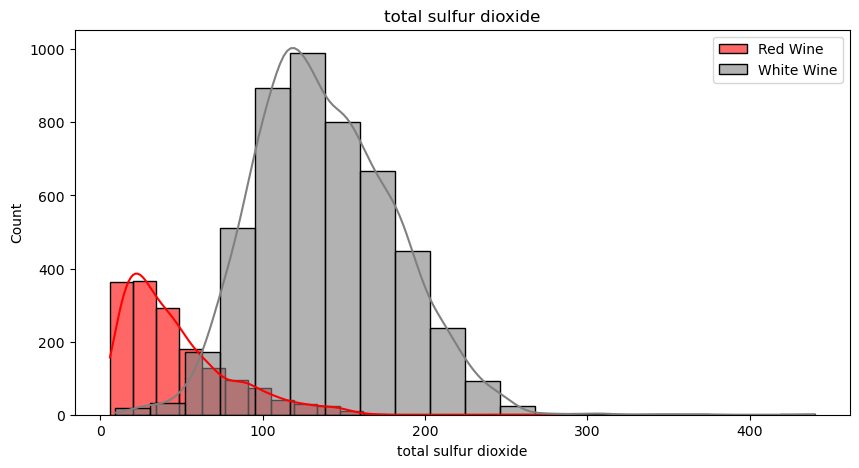

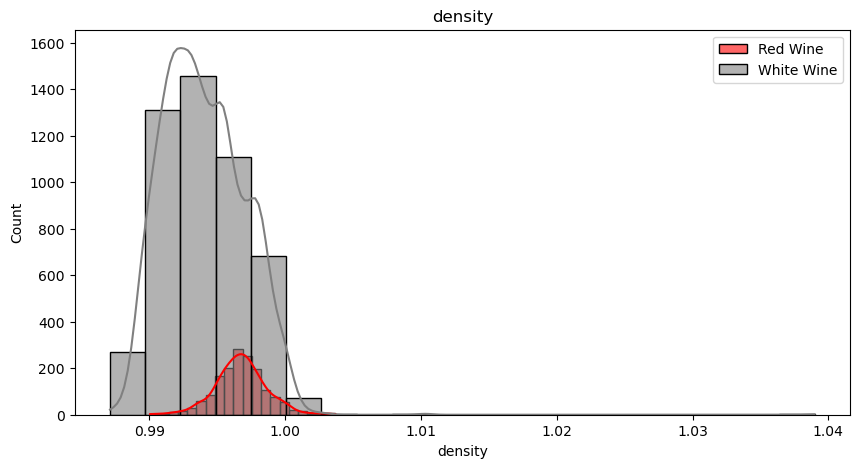

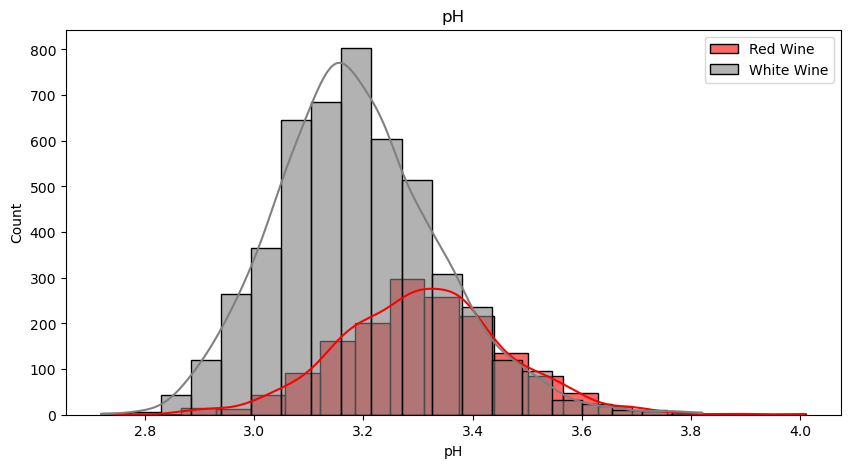

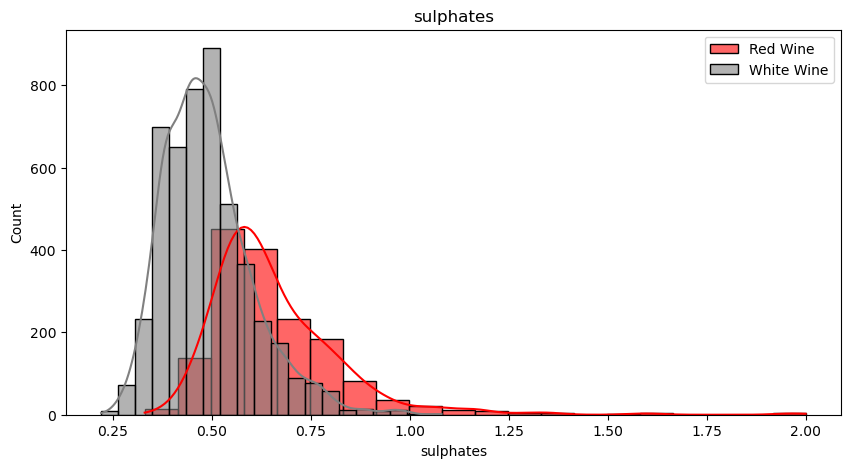

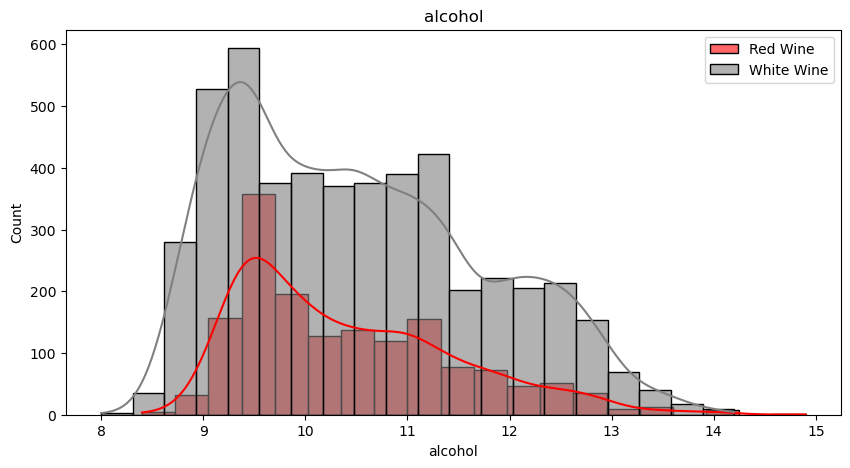

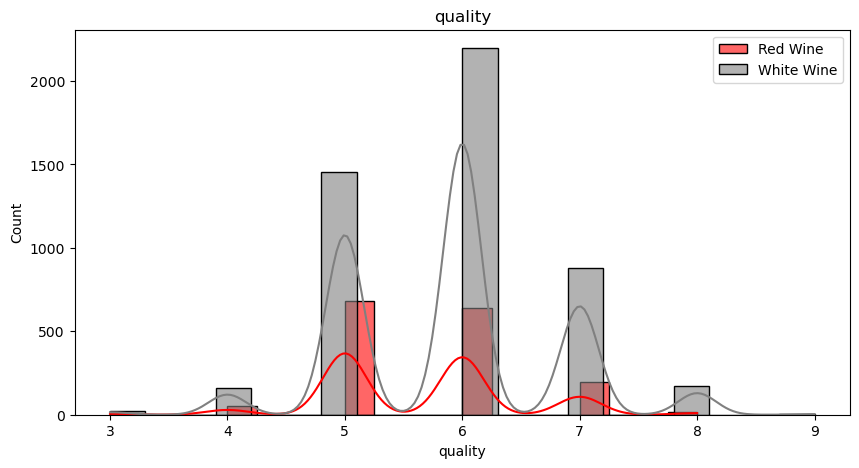

In [162]:
# Plot histograms for both red and white wine data
for i, column in enumerate(winequality_red_df.columns):
    plt.figure(figsize=(10, 5))
    sns.histplot(winequality_red_df[column], color='red', label='Red Wine', kde=True, bins=20, alpha=0.6)
    sns.histplot(winequality_white_df[column], color='grey', label='White Wine', kde=True, bins=20, alpha=0.6)
    plt.title(column)
    plt.legend()
    plt.show()

**Interpretation:**

- **Fixed acidity:**  White wine has slightly higher concentrations between 6 and 8, with a significant peak at 7. Red wine has a more consistent distribution between 6 and 8, with a less noticeable peak than white wine.
- **Volatile acidity:**  White wine has typically lower values (peaking at 0.25), indicating less volatility than red wine. Red Winehas a higher percentage of 0.6 indicates more volatile acidity on average. 
- **Citric Acid:**  White wine has a higher concentration of citric acid (about 0.25%) than red wine. Red wine has lower citric acid levels overall, with a peak near zero.
- **Residual Sugar:**  White wine has significantly higher values with peaks around 1-10, indicating sweeter wines overall. 
Red wine is concentrated around 1-3, with significantly lower sugar concentration than white wine   
- **Chlorides:** White Wine peaks between 0.05 and 0.1, indicating reduced chloride content. Red wine has somewhat higher average chloride levels than white wine.
- **Free Sulfur Dioxide:**   White wine has significantly higher levels (peaks at 30-60) and a wider disper ion.
Red wine has lower free sulfur dioxide levels.
- **Total Sulfur Dioxide:**  White wine has significantly greater amounts, peaking around 150 due to preservatives. Red wine has Lower concentrations, around 50.
- **Density:**  White wine has lower densities, clustering about 0.995–1.00 .Red wine has slightly greater densities, reaching about 1
- **pH:**  White wine has a lower pH (about 3.2), indicating higher acidity. Red Wine: Higher pH levels (closer to 3.4) indicate less acidic wine 
- **Sulphates:**  White wine has lower amounts, peaking at 0. -0.5. Red wine contains higher levels (about 0.6), which contribute to its tannic properties.
- **Alcohol:**   White wine has a higher alcohol percentage on average, peaking around  0-11%. Red wine has lower alcohol contents, often betwee
- **Quality**  White Wine: Peaks around 6, indicating higher average quality ratings. Red wine has slightly lower ratings, peaking around 5 
- **Conclusion**  White wine is generally sweeter, has more sulfur dioxide, and contains somewhat more alcohol. Red wine often has stronger acidity (volatile and total), higher sulfates, and a slightly thicker body.   .0.    

### Question 3

#### (a) Combine the two datasets into a single DataFrame.

In [163]:
wine_data = pd.concat([winequality_red_df, winequality_white_df], ignore_index=True)
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Details:**

 - I have used `pandas.concat()` to combine two data frames.
 - Since the columns of the two data frames are same, we can go ahead with the concatenation without any modification.
 - Displayed the first 5 rows for reference.

#### (b) Compute the Pearson correlation coefficient between each of the measurements and identify which indicators are most correlated. List the four most strongly correlated pairs.

In [164]:
# Correlation matrix
correlation_matrix = wine_data.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [165]:
# Most correlated pairs
corr_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
unique_corr_pairs = corr_pairs[~corr_pairs.duplicated(keep='first')]
strong_pairs = unique_corr_pairs[corr_pairs < 1].head(4)
print("Most strongly correlated pairs:\n", strong_pairs)

Most strongly correlated pairs:
 total sulfur dioxide  free sulfur dioxide    0.720934
residual sugar        density                0.552517
total sulfur dioxide  residual sugar         0.495482
fixed acidity         density                0.458910
dtype: float64


**Details:**

- Displayed a correlation matrix between variables. this matrix has all the combination's correlation.
- Getting the pairs from the matrix in a descending order and displayed the first 4 pairs with high value. I have removed the duplicates since correlation between (var A, var B) is same as (var B, var A)

**Interpretation:**
  
  Total sulfur dioxide and free sulfur dioxide have a moderately to strongly positive association `(0.72)`.This can be understood because both are sulphur levels. The next correlation is highest with residual sugar and density. This relation is perfectly understandable as the sugar content increases it automatically increases the density. The same follows up with sulphur dioxide and sugar. Next with acidity and density, we know that acidic mixtures are dense compared to less acidic mixtures. 

#### c) Create scatter plots for the each of the correlated pairs identified in Q3(b). Are the relationships as expected from the correlation coefficients?

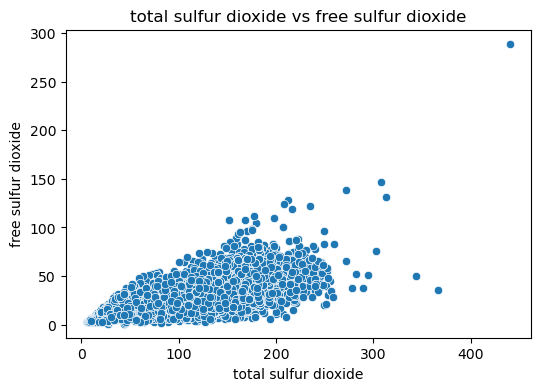

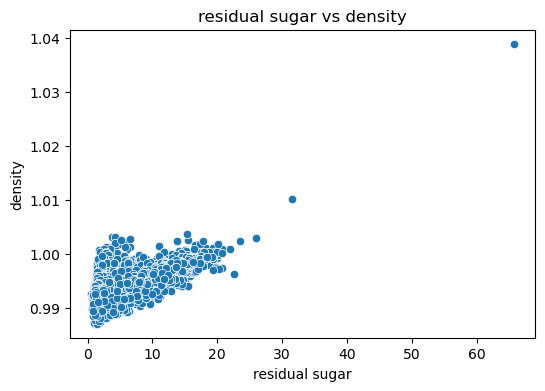

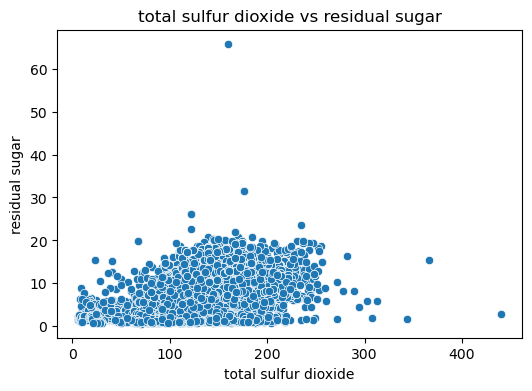

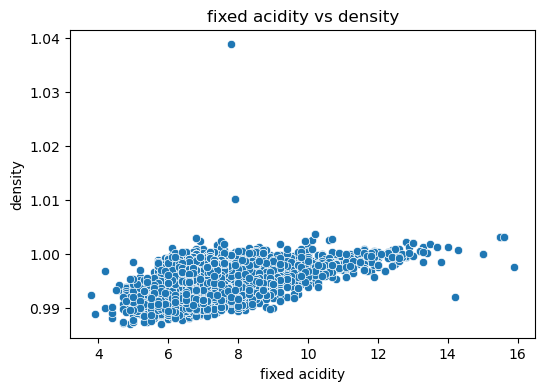

In [166]:
# Scatter plots for most correlated pairs
for pair in strong_pairs.index:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=wine_data[pair[0]], y=wine_data[pair[1]])
    plt.title(f'{pair[0]} vs {pair[1]}')
    plt.show()

**Details:**

- I have created scatter plots for each of the pair and displayed it.
- There are 4 plots in total for 4 highly correlated pairs.

**Interpretation:**

Yes, the relationship expected from the correlation coefficients are visible here evidently. The highest correlated values total sulphur dioxide and free sulphur dioxide has the highest slope compared to the other three. From plots 1 to 4, the slope's angle decreases showing us the correlation has decreased is decreasing correlation.


### Question 4 - Linear regression to predict wine quality.
#### (a) We consider wine with a quality score from 0 to 5 as being POOR, while quality scores from 6-10 are considered GOOD. Create a new column in the dataframe indicating whether the wine is POOR or GOOD.

In [167]:
wine_data['qualityCategory'] = wine_data['quality'].apply(lambda x: 'GOOD' if x > 5 else 'POOR')
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualityCategory
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,POOR
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,POOR
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,POOR
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,GOOD
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,POOR


**Details:**

- I have used lambda function to assign quality score as a new variable `qualityCategory`.
- If quality is greater than 5, its labelled as `GOOD` and less than or equal to 5 is labelled as `POOR`
- Displaying the first 5 rows for better understanding.

#### (b) Separate the data into response and predictor variables and standardise the predictor variables.

In [168]:
#Seperate predictor and response variables
X = wine_data.drop(columns=['quality', 'qualityCategory'])
y = wine_data['quality']

#Standardise predictor variables
X_std=(X-X.mean())/X.std()
X_std.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394
1,0.451001,3.281982,-2.192664,-0.597594,1.197883,-0.311296,-0.862402,0.701432,-0.115064,0.999502,-0.580023
2,0.451001,2.553104,-1.917405,-0.660648,1.026618,-0.874695,-1.092402,0.768128,0.258100,0.797897,-0.580023


**Details:**

- Predictor variables are stored as X and response variable as y. Response variables quality and qualityCategory has been dropped to assign predictor variables.
- Standardised the predictor variables using formula and displayed forst three rows for better understanding.

**Interpretation:**

   Here, the formula to standardise the predictor variables is predictor variables minus the mean and divide the difference by standard deviation. Features were standardised to improve model performance.

#### (c) Fit a linear regression model and interpret the fitted model.

In [169]:
reg = linear_model.LinearRegression()
reg.fit(X,y)

# Get model coefficients and intercept
coefficients = reg.coef_
intercept = reg.intercept_

# Display model interpretation
print("\nLinear Regression Model:")
print(f"Intercept: {intercept:.3f}")
for i, col in enumerate(X.columns):
    print(f"Coefficient for {col}: {coefficients[i]:.3f}")


Linear Regression Model:
Intercept: 55.763
Coefficient for fixed acidity: 0.068
Coefficient for volatile acidity: -1.328
Coefficient for citric acid: -0.110
Coefficient for residual sugar: 0.044
Coefficient for chlorides: -0.484
Coefficient for free sulfur dioxide: 0.006
Coefficient for total sulfur dioxide: -0.002
Coefficient for density: -54.967
Coefficient for pH: 0.439
Coefficient for sulphates: 0.768
Coefficient for alcohol: 0.267


**Details:**

- Fitted the regression model with X and y using `LinearRegression()`
- Obtained the intercept and coefficients and displayed the coefficients with its relative columns

**Interpretation:**

 **1. Intercept:** When all of the input features are zero, the intercept is the expected value of the target variable.
 
 **2. Coefficients:** The coefficients represent each feature's association with the variable quality. Each coefficient indicates how much the target variable (quality) is projected to change when the relevant feature is increased by one unit, while all other features remain constant.
 
  * **Coefficient for `fixed acidity`**: For every 1 unit increase in fixed acidity, the dependent variable rises by `0.068` units (`positive correlation`).
  * **Coefficient for `volatile acidity`**: Every 1 unit increase in volatile acidity reduces the wine quality by 1.328 units (`negative correlation`).
  * **Coefficient for `citric acid`**: For every one unit increase in citric acid, the quality drops by 0.110 (`negative correlation`).
  * **Coefficient for `residual sugar`**: For every one unit increase in residual sugar, the quality increases by 0.044 units (`positive correlation`).
  * **Coefficient for `chlorides`**: For every one unit rise in chlorides, the quality drops by 0.484 units (`negative correlation`).
  * **Coefficient for `free sulfur dioxide`**: For every one unit increase in free sulfur dioxide, the quality increases by 0.006 units(`positive correlation`).
  * **Coefficient for `total sulfur dioxide`**: For every one unit rise in total sulfur dioxide, the quality reduces by 0.002 (`negative correlation`).
  * **Coefficient of `density`**: For every one unit increase in density, the quality drops by 54.967 units (`negative correlation`).
  * **Coefficient of `pH`**: The quality increases by 0.439 units for every one unit increase in pH (`positive correlation`).
  * **Coefficient of `sulphates`** : The quality rises by 0.768 units for each unit increase in sulphates (`positive correlation`).
  * **Coefficient of `alcohol`**: The quality rises by 0.267 units for every one unit of alcohol consumed (`positive correlation`).

Features including `fixed acidity`, `residual sugar`, `free sulfur dioxide`, `pH`, `sulphates`, and `alcohol` have positive coefficients, indicating a positive association with the quality.  Features including` volatile acidit`y,` citric aci`d,` chloride`s, and` densit`y have negative coefficients, indicating a negative association with thequalitye `Density` has the highest negative impact on the target variable, with a coefficient of -54.967.
On the other hand,` free sulfur dioxid `e and` total sulfur dioxid `e have negligible impacts, with coefficients of 0.006 and -0.002, respectively..

#### (d) Perform forward selection for your regression model using the Akaike Information Criterion (AIC). Examine the selected model and discuss your findings in relation to the model fitted in part (b).

In [170]:
def forward_selection(X, y):
    remaining_features = list(X.columns)
    selected_features = []
    best_aic = np.inf
    while remaining_features:
        aic_with_feature = []
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            aic_with_feature.append((feature, model.aic))
        feature, aic = min(aic_with_feature, key=lambda x: x[1])
        if aic < best_aic:
            best_aic = aic
            selected_features.append(feature)
            remaining_features.remove(feature)
        else:
            break
    return selected_features

selected_features = forward_selection(X_std, y)
print("Selected Features:", selected_features)

Selected Features: ['alcohol', 'volatile acidity', 'sulphates', 'residual sugar', 'total sulfur dioxide', 'free sulfur dioxide', 'chlorides', 'pH', 'density', 'fixed acidity']


**Details:**

1. Start with a model with no variables (save the intercept). Perform a linear regression and record the AIC. We now use this model. 
2. Determine the most significant variable, that is, the variable that reduces the AIC the greatest.
   - a. Perform a linear regression with the existing model and one more variable, and note the drop in AIC. 
   - b. Repeat step 2a for any variables not included in the current model.
   - c. Identify the variable with the greatest drop in AIC.
   - d. Improve the present model by incorporating the variable that reduces the AIC the most.
3. If none of the variables lowers the AIC, proceed to Step 4.
Otherwise, continue Step 2 until adding variables no longer lowers the AIC. 
4. Report your final selected variables.

 **Interpretation and analysis:** 
 
 - The forward selection approach identified ten features that contributed to the model based on the Akaike Information Criterion (AIC). When considering model complexity and goodness of fit, these features were shown to be the most predictive.
 - The linear regression model incorporates these features, but additionally `citric acid`, which was not chosen through forward selection. This shows that citric acid may not have had strong predictive value after the other features were chosen, which is why it was removed from the forward selection process
 - We can improve the linear regression model by deleting characteristics that were rejected by forward selection (e.g., citric acid) or testing other methods such as regularization to avoid overfitting and choose the most significant features..s.

### Question 5 - Random forest regression to predict the quality of a wine.

#### (a) Split the data into appropriate training and test sets.

In [171]:
# Train-test split (75% test, 25% Train)
train_size = int(0.75 * len(y)) 

np.random.seed(123)
train_select = np.random.permutation(range(len(y)))

X_train = X.iloc[train_select[:train_size], :].reset_index(drop=True)
X_test = X.iloc[train_select[train_size:], :].reset_index(drop=True)
y_train = y.iloc[train_select[:train_size]].reset_index(drop=True)
y_test = y.iloc[train_select[train_size:]].reset_index(drop=True)

**Details:**

- I have taken the size of training set to be 75% of total data size.
- Then random rows of the data set has been selected for test and train data.  

#### (b) Fit a random forest regression model with 10 trees using the training data. Include the argument random_state=101 in the random forest regression function to ensure reproducible results. Determine which variables are most important in predicting the quality of a wine. Discuss your findings in relation to the linear model’s fit in question 4.

In [172]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=101)
rf_model.fit(X_train, y_train)

#Obtain feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort the features by importance
feature_importances = feature_importances.sort_values(ascending=False)
feature_importances                                        

alcohol                 0.251464
volatile acidity        0.129599
free sulfur dioxide     0.088495
total sulfur dioxide    0.076572
pH                      0.074643
residual sugar          0.072653
sulphates               0.071119
chlorides               0.066195
density                 0.057333
citric acid             0.056895
fixed acidity           0.055032
dtype: float64

**Details:**

- A Random Forest is an ensemble machine learning approach made up of numerous decision trees. It creates numerous decision trees and combines their predictions to increase overall accuracy.
- `n_estimators=10` : This option determines the number of trees in the forest. In this scenario, the forest will consist of ten decision trees.
- `random_state=101`: This parameter determines the random seed for reproducibility. Setting the random_state ensures that your model's training results are consistent across runs.
- The model is fitted for the given variables.
- To view the importance of predictors in the model, we obtain feature importance for each column and display the same.

**Interpretation and comparison:**

a) Indicators having Significant Influence in Both Models: `alcohol`, `volatile acidity`, `residual sugar`, `free sulfur dioxide`, `chlorides`, `pH`.

b) Indicators with lower importance: `citric acid`, `sulphates`, `density`(But high negative coefficient), `fixed acidity`.

Linear models, such as Linear Regression, imply a linear connection between the features and the objective variable and are easy to interpret. In this situation, features such as volatile acidity and density play a larger impact (strong coefficients), indicating a clear linear effect on the target.

Random Forest, on the other hand, detects nonlinear correlations and interactions between features. It assigns varying levels of priority to features, providing greater flexibility in capturing complicated patterns. For example, it places intermediate importance on variables such as free sulfur dioxide and residual sugar, which may have more complex connections with the objective.

#### (c) Use the random forest regression model to predict the quality of a wine for the test set. Create a scatter plot of the true quality versus the predicted one. Interpret your plot.

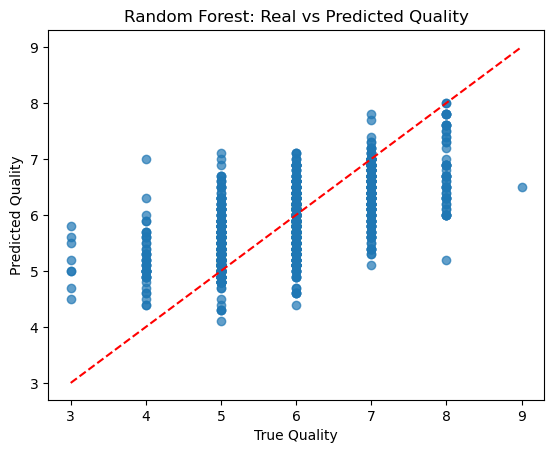

In [173]:
#Prediction
y_pred = rf_model.predict(X_test)

#Scatter plot to compare real and prediction data
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("True Quality")
plt.ylabel("Predicted Quality")
plt.title("Random Forest: Real vs Predicted Quality")
# Add a 45-degree line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

**Details:**
- The function predict has been used to predict the quality of wine.
- The True given values and the predicted values are plotted in a scatter plot.

**Observations:**
- **General Trend:** The dots cluster around the 45-degree diagonal line, suggesting that the Random Forest model well represents the overall trend of wine quality predictions.
- **Prediction Accuracy:** For wine quality scores 5, 6, and 7, forecasts closely match true values, indicating that the model performs well at these quality levels.
- **Prediction Errors:** A few outliers deviate significantly from the red line maily for wine quality with scores 3,4,8,9.
- **Rare scores:** The model does well with common scores but struggles with less frequent extremes (3, 4, or 8).
- **Conclusion:** The model is usually good at predicting wine quality, with some prediction mistakes and increased variance for higher-frequency quality scores (5-7).

#### (d) Assess the performance of a random forest regression model with 5, 10, 50, 100, 500, 1000, and 5000 trees in predicting the quality of a wine. You should repeat the model fit and prediction 20 times for each number of trees, using a different random state for each repeat. Create a plot of the model performance as a function of the number of trees (use a log axis for the number of trees). The plot should show the mean and standard error of the performance metric for each number of trees. Discuss your findings.

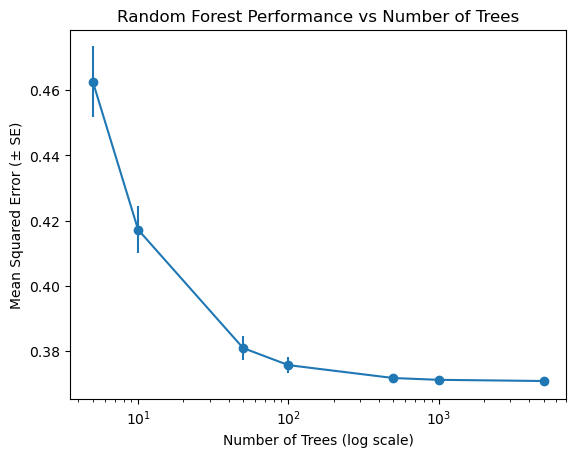

In [174]:
# Evaluating model performance with different number of trees
tree_counts = [5, 10, 50, 100, 500, 1000, 5000]
mean_mse = []
std_error = []

for n_trees in tree_counts:
    mse_scores = []
    for random_state in range(20):
        rf_model = RandomForestRegressor(n_estimators=n_trees, random_state=random_state,n_jobs=-1)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        mse_scores.append(mean_squared_error(y_test, y_pred))
    mean_mse.append(np.mean(mse_scores))
    std_error.append(np.std(mse_scores))

# Plotting performance
plt.errorbar(tree_counts, mean_mse, yerr=std_error, fmt='-o')
plt.xscale('log')
plt.xlabel('Number of Trees (log scale)')
plt.ylabel('Mean Squared Error (± SE)')
plt.title('Random Forest Performance vs Number of Trees')
plt.show()

**Details:**

- I have defined the number of trees to fit the model.
- Using a for loop, I fit the model with each number of trees specified, predict it and find mean squared error and store it in a variable
- I plot number of trees against the error.

**Observations:**
     
- At lower tree counts (e.g., 5, 10), the MSE is rather high with substantial variability, as seen by the error bars. This is due to insufficient ensemble size for reliable forecasts.
- However, as the number of trees grows (e.g., beyond 100), the MSE falls dramatically and stabilizes, showing the diminishing returns of adding more trees.
- As the number of trees increases, the error bars reduce, indicating that the model performs more consistently across random seeds. The logarithmic scale depicts the diminishing improvement in MSE as the number of trees increases.
- After about 500 trees, the performance increases are insignificant.

**Conclusion:**  

   Adding more trees initially increases the model's performance, but beyond a certain number (about 500), the gains plateau. A Random Forest with around 500 trees is suitable for this dataset, balancing performance and computational cost.

   

#### (e) Explain the rationale for fitting the model multiple times with different random states.

**Explanation:**

- Random forests rely on randomization during training, such as bootstrapping samples and random feature selection, which can result in performance variability.
- Training the model several times with different random states enables a more accurate assessment of its stability and robustness.
- Because of its vulnerability to certain random initializations, a single model fit may produce an overly positive or negative performance estimate.
- Analyzing performance indicators (such as accuracy) over numerous model instances demonstrates how randomness affects the outcomes.
- The mean and standard deviation of these metrics are more trustworthy indicators of the model's projected performance and variability.
- This technique allows a more accurate assessment of the model's predicting skills and identifies if its performance is consistently trustworthy or influenced by random changes.
- Finally, this approach allows for a better grasp of the model's true capability and resilience to training variability..ity.

### Question 6
Clustering algorithms to identify different wine groups
#### (a) Perform a k-means cluster analysis, using the indicators as the features. Run the clustering algorithm for different numbers of clusters (integers from 1 to 10). Plot the model performance as a function of the number of clusters and identify the optimal number of clusters for this data.


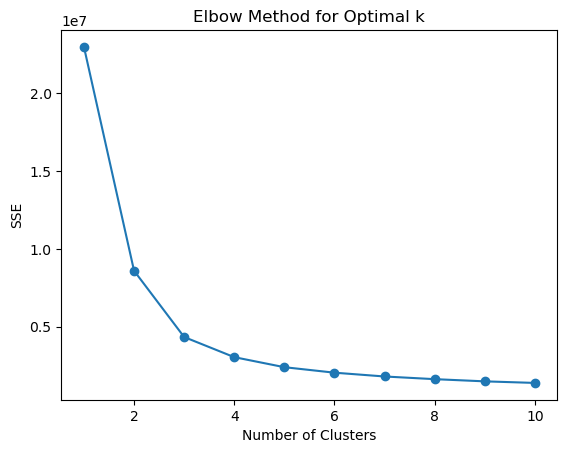

In [183]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=101)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

**Interpretation:**

- We run the algorithm for k= 1-10 and plot it as a graph against SSE.
- For cluster 3, the curve starts to stagnate. Thus we take optinal k as 3.

#### (b) Perform a k-means cluster analysis, using the optimal number of clusters (identified in part (a)), and identify the most discriminatory variables. (Hint: Create histograms for each variable, with the data separated by cluster.)

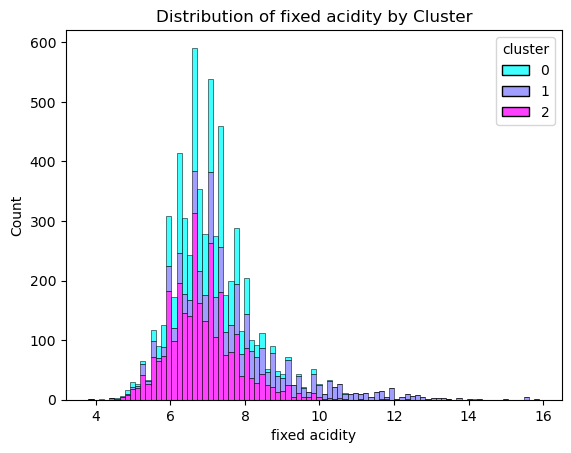

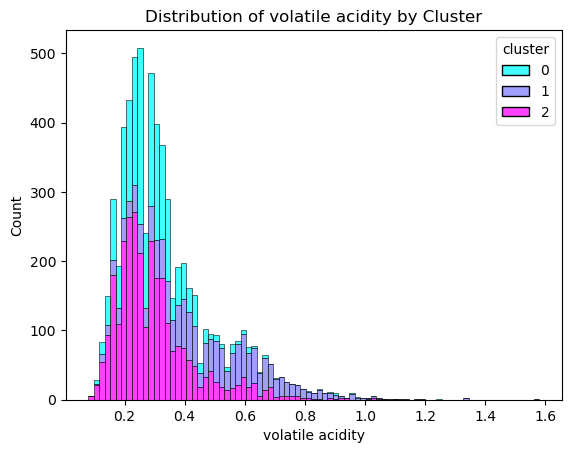

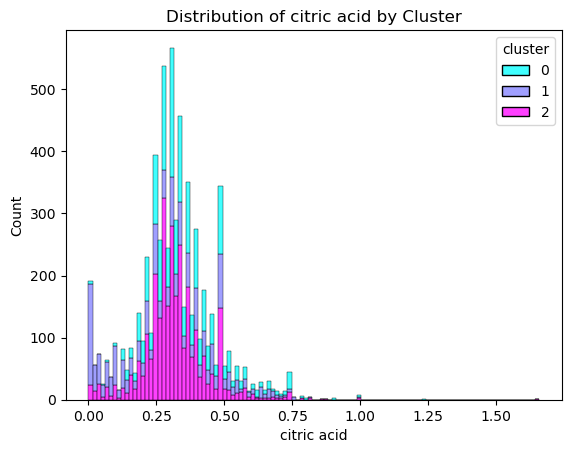

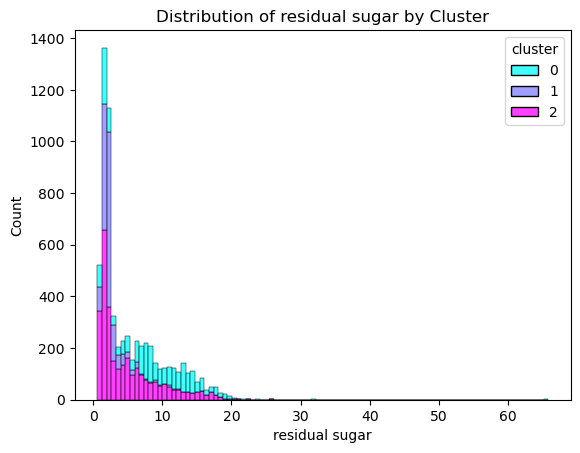

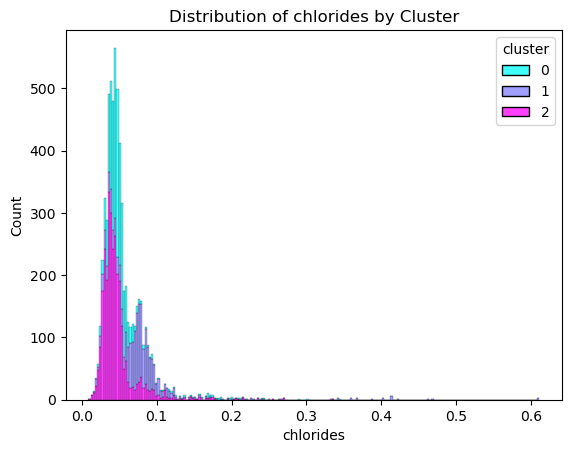

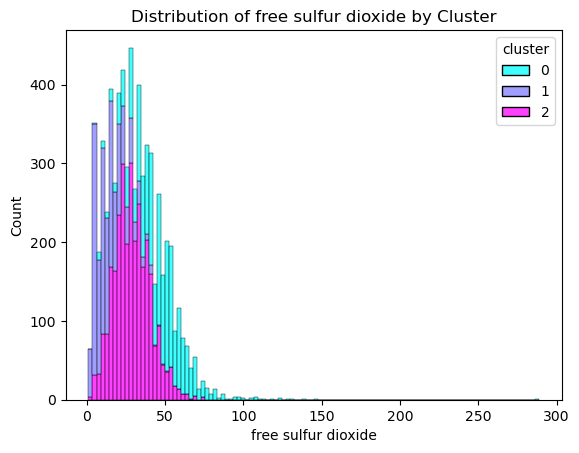

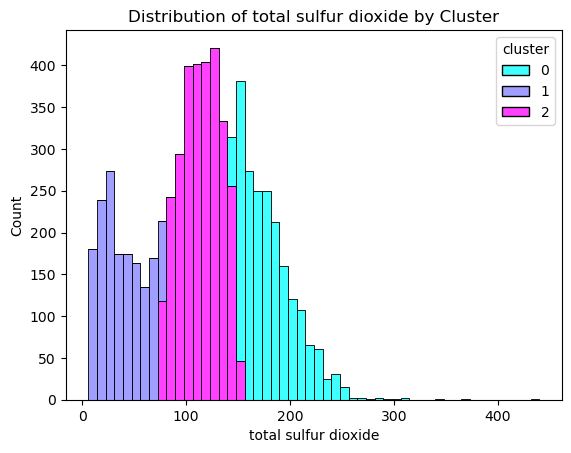

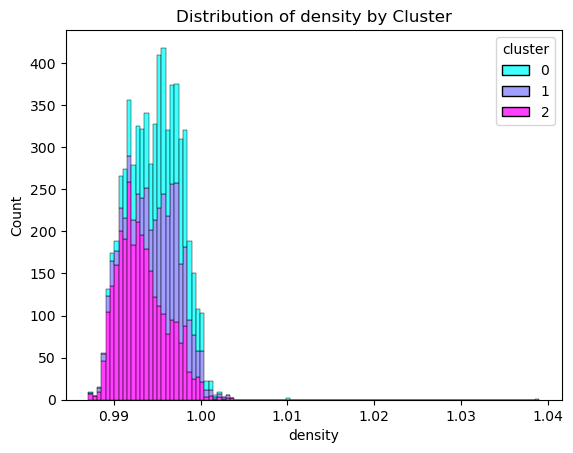

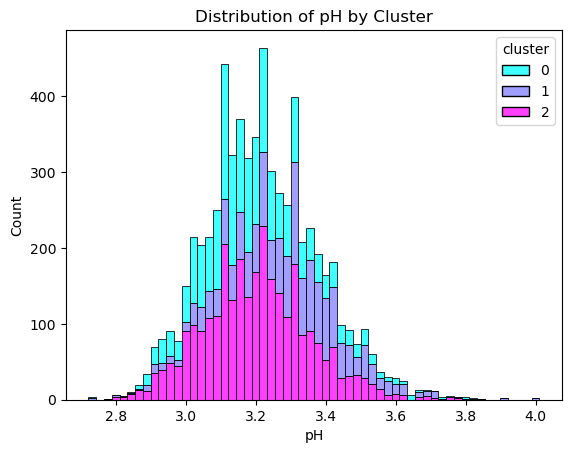

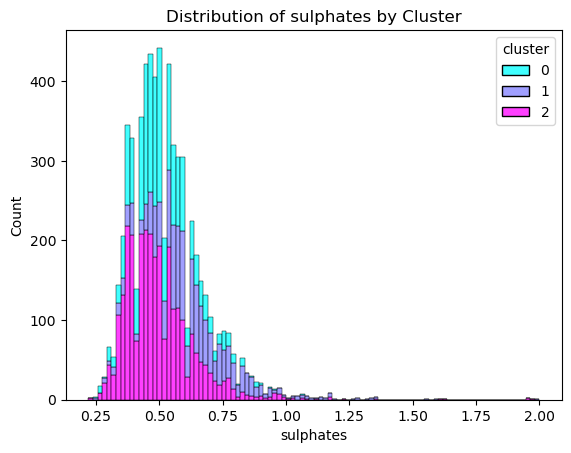

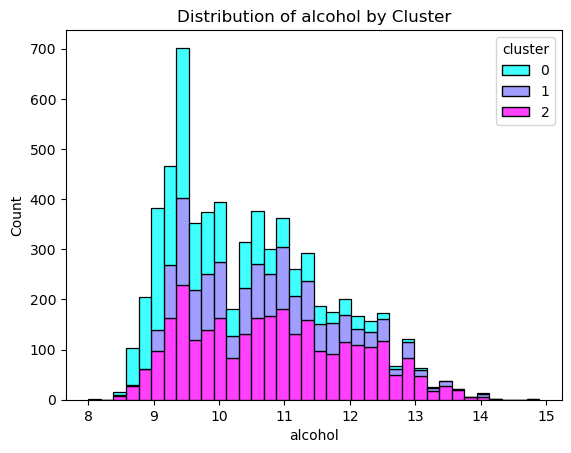

                 Feature   F-Statistic        P-Value
6   total sulfur dioxide  18289.157801   0.000000e+00
5    free sulfur dioxide   2948.981557   0.000000e+00
1       volatile acidity   1002.764355   0.000000e+00
3         residual sugar    984.094934   0.000000e+00
7                density    658.768650  3.250397e-261
0          fixed acidity    650.687964  2.706709e-258
4              chlorides    553.120890  1.516325e-222
9              sulphates    483.066087  2.626818e-196
10               alcohol    416.381945  7.202540e-171
8                     pH    225.370723   2.344716e-95
2            citric acid    122.530444   5.823702e-53


In [176]:
optimal_k = 3  # Determined from elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=101)
wine_data['cluster'] = kmeans.fit_predict(X)

# Find Most discriminatory variables
# Via graph
for column in X.columns:
    sns.histplot(data=wine_data, x=column, hue='cluster', multiple='stack', palette='cool')
    plt.title(f"Distribution of {column} by Cluster")
    plt.show()

#Via F test
# Perform ANOVA for each feature
f_values = []
p_values = []
for feature in X.columns:
    f, p = f_oneway(*[wine_data[feature][wine_data['cluster'] == i] for i in range(optimal_k)])
    f_values.append(f)
    p_values.append(p)

# Store results and sort by F-statistic
feature_anova = pd.DataFrame({'Feature': X.columns, 'F-Statistic': f_values, 'P-Value': p_values})
feature_anova = feature_anova.sort_values(by='F-Statistic', ascending=False)
print(feature_anova)

**Details:**

- I have fitted the model with optimal clusters as 3
- To find the most discriminatory variables, I use both histogram method and F statistic

**Interpretation:**

- When we use statistic method(F test), we take the varibale with highest F value to be the most discriminatory variable.
- When we consider graph, we check for the graphs that have clusters that are less overlapped.

#### (c) Create a series of scatter plots for the most discriminatory variables, colouring the points by cluster number. Discuss your findings.

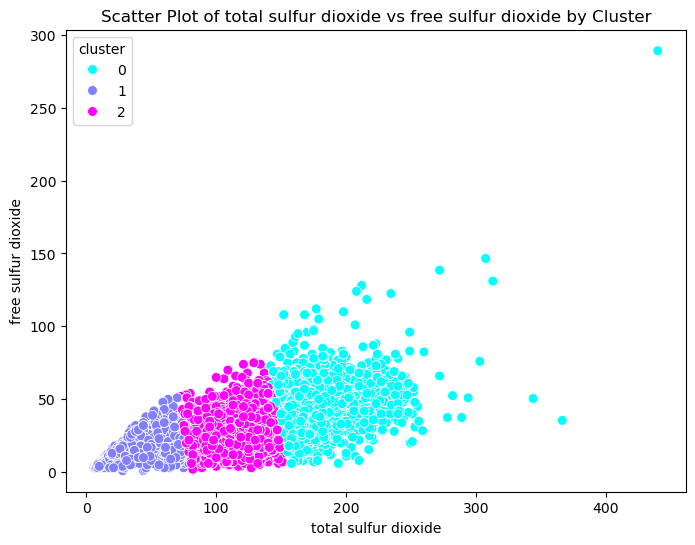

In [177]:
most_discriminatory_vars = ['total sulfur dioxide', 'free sulfur dioxide']  # Example variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wine_data, x=most_discriminatory_vars[0], y=most_discriminatory_vars[1], hue='cluster', palette='cool', s=50)
plt.title(f'Scatter Plot of {most_discriminatory_vars[0]} vs {most_discriminatory_vars[1]} by Cluster')
plt.xlabel(most_discriminatory_vars[0])
plt.ylabel(most_discriminatory_vars[1])
plt.show()

**Details:**

- I have created a scatter plot between total sulphur dioxide and free sulphur dioxide.
- This data is distributed with clusters which are represented in each colour.
  
**Interpretation:**

The scatterplot depicts the link between total and free sulfur dioxide across three clusters:
- `Cluster 0 (Cyan)` has the highest concentrations of total and free sulfur dioxide. 
The spread is significant, extending to the broadest limits (total sulfur dioxide > 200 and free sulfur dioxide > 150) 
Contains outliers with exceptionally high sulfur dioxide level
- `Cluster 1 (Purple)` indicates the lowest values for both variabl s.
Concentrated at low levels, with total sulfur dioxide values typically below 100 and free sulfur dioxide values below 50.
The cluster is densely packed, showing rather homogenous features
- `Cluster 2 (Magenta)` occupies an intermediate range.
The majority of data points are centered around total sulfur dioxide levels of 100-200 and free sulfur dioxide levels ranging from 50 

There is a positive association between total and free sulfur dioxide throughout all clusters, with Cluster 0 showing more dispersion. Overall, the clusters are well separated, with only a little overlap between Clusters 0 and 2. These characteristics effectively divide wines into various categories, which could indicate preservation processes or quality levels.evels.

#### d) Identify another clustering algorithm that may be suitable for this data. Give an overview of your chosen algorithm and discuss the type of problems it works best for. Repeat part (a)–(c) using your chosen algorithm. Discuss your results in relation to those from the k-means cluster analysis..

In [178]:
sil_scores = []
k_range = range(2, 11)  # Evaluating for k = 2 to 10 clusters

# Compute silhouette scores
for k in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')  # Using Ward’s method
    cluster_labels = agg_clustering.fit_predict(X)
    sil_score = silhouette_score(X, cluster_labels)
    sil_scores.append(sil_score)

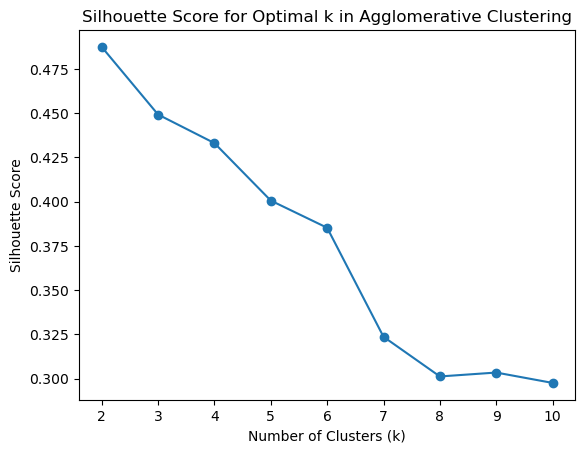

In [179]:
# Step 3: Plot the silhouette scores
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k in Agglomerative Clustering')
plt.show()

In [180]:
# From the plot, choose the optimal k based on the highest silhouette score
optimal_k = k_range[sil_scores.index(max(sil_scores))]  # Choose the k with the highest silhouette score
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

Optimal number of clusters based on silhouette score: 2


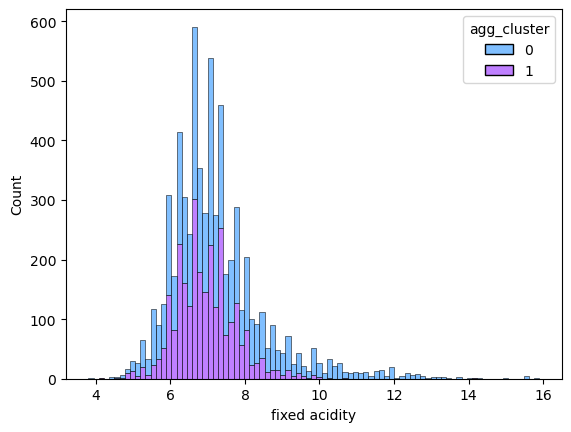

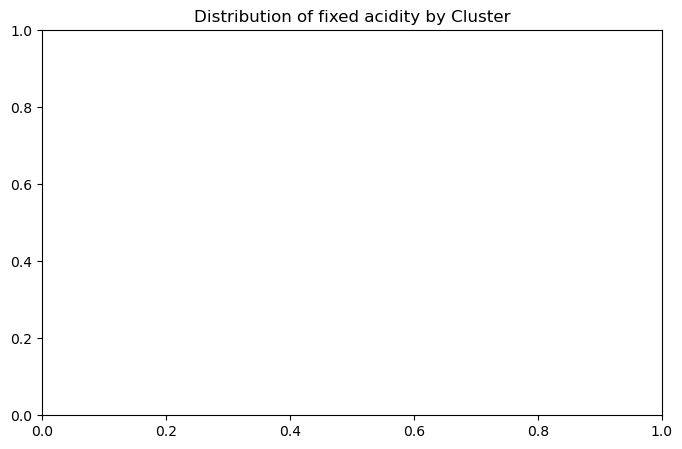

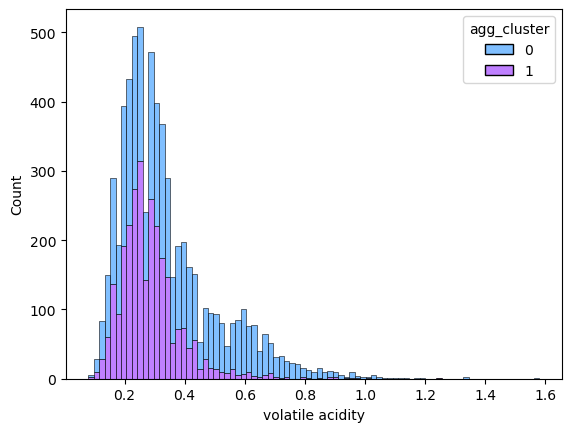

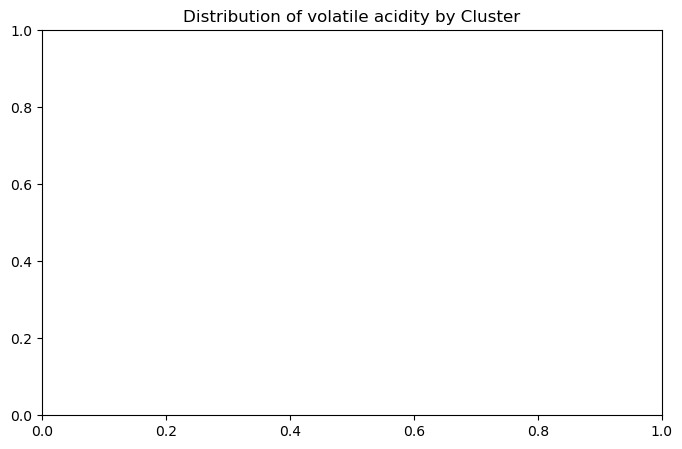

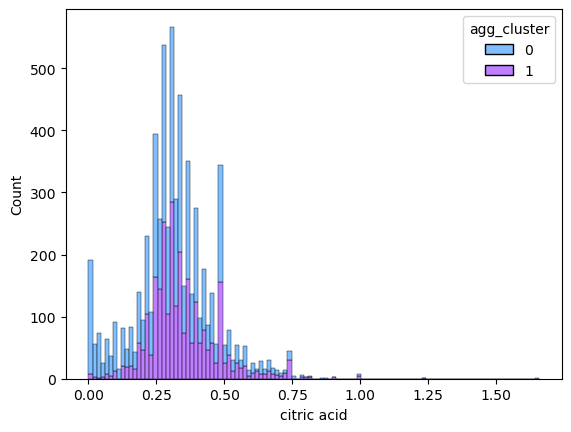

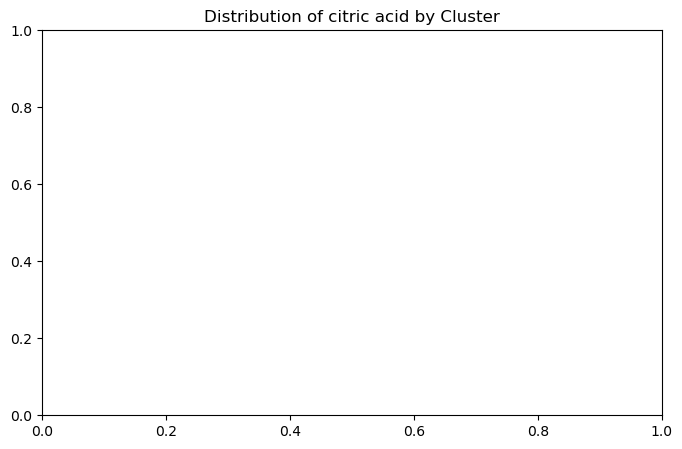

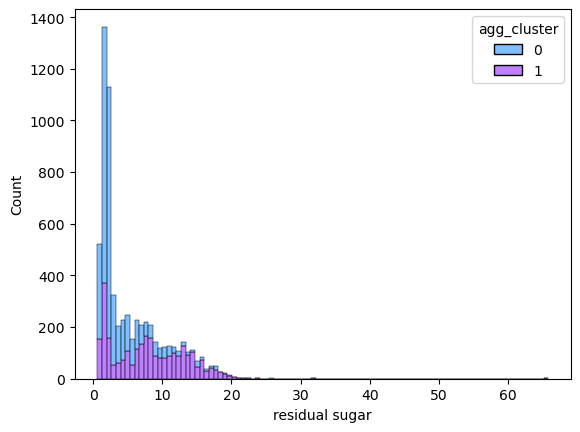

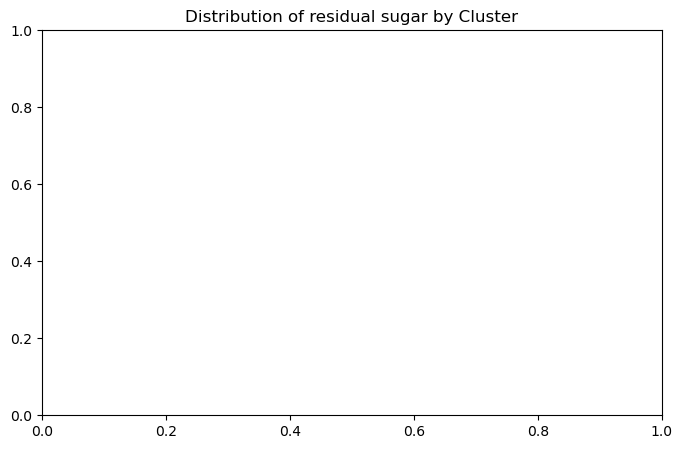

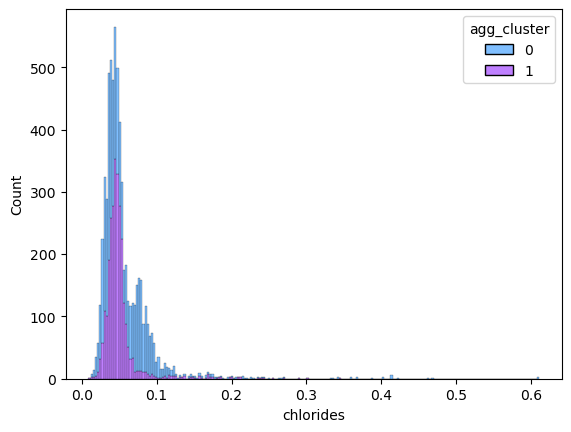

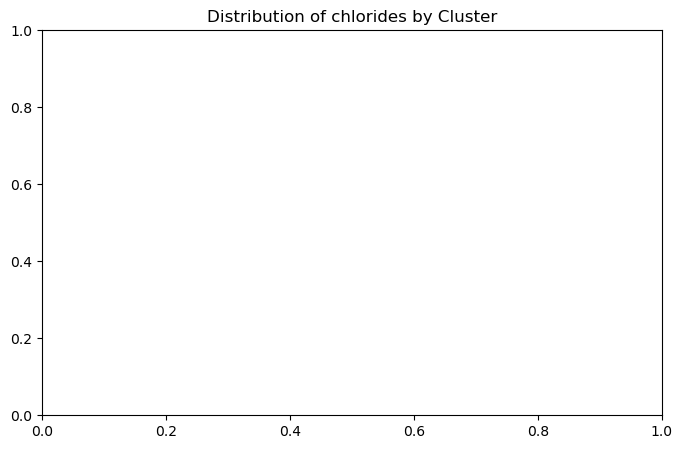

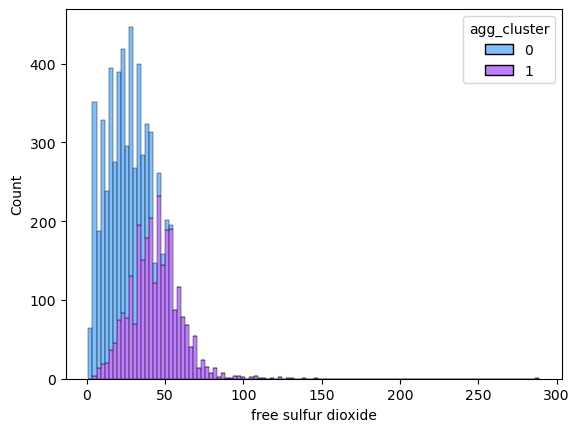

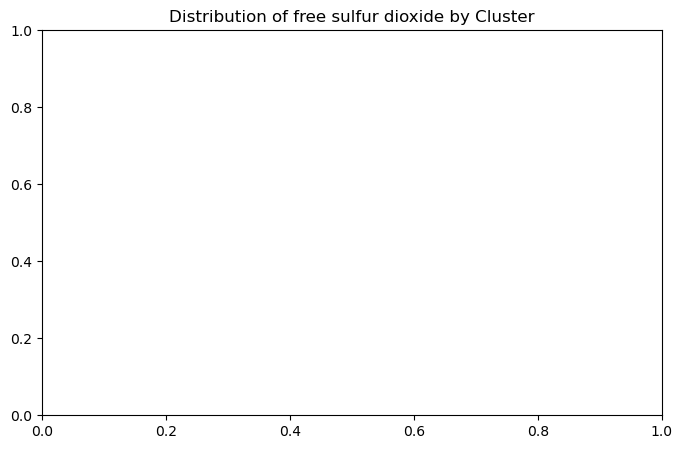

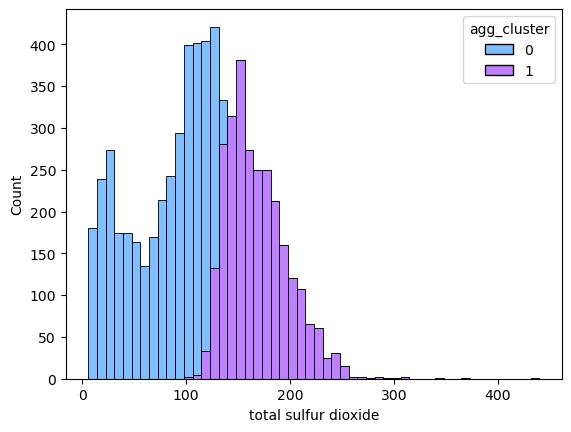

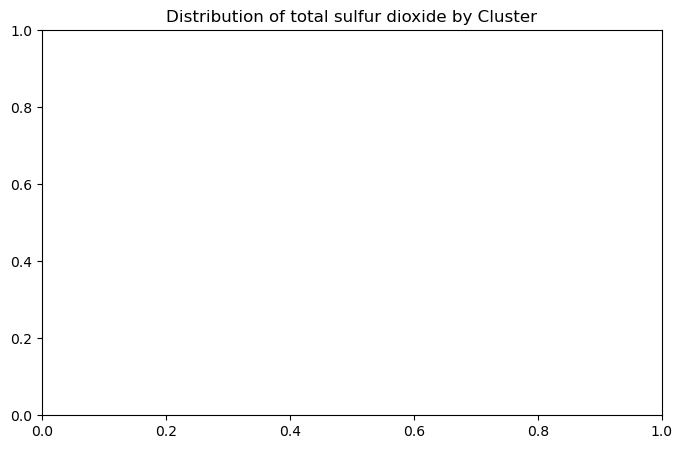

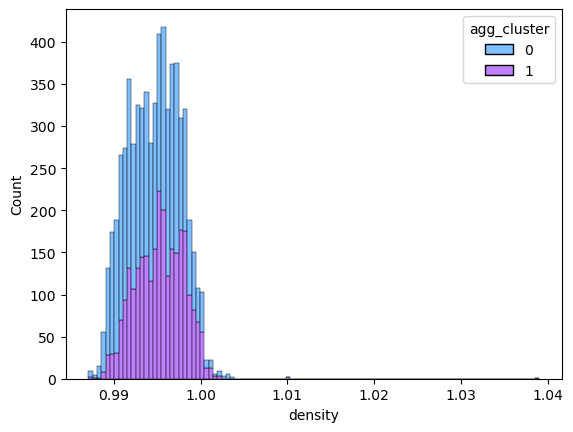

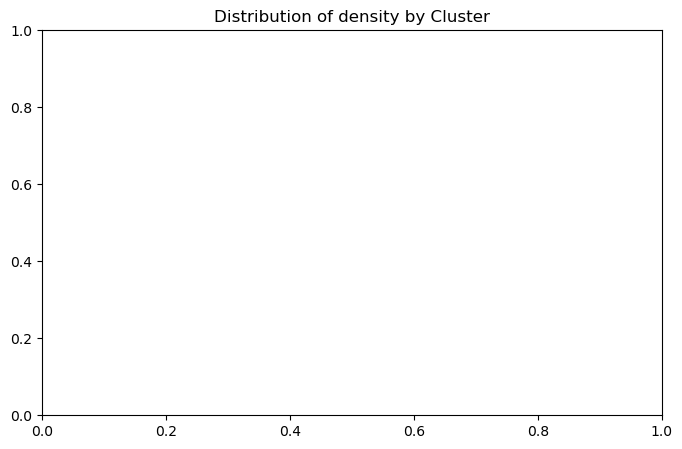

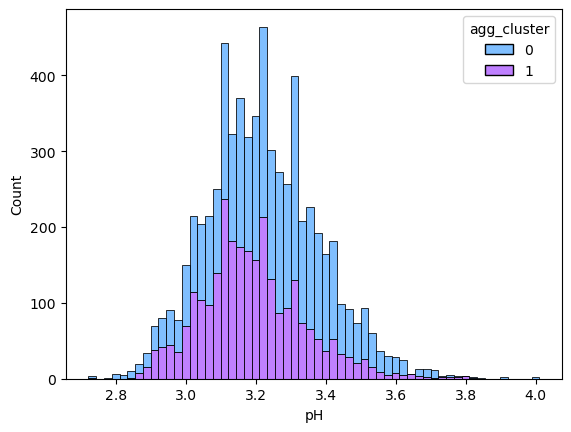

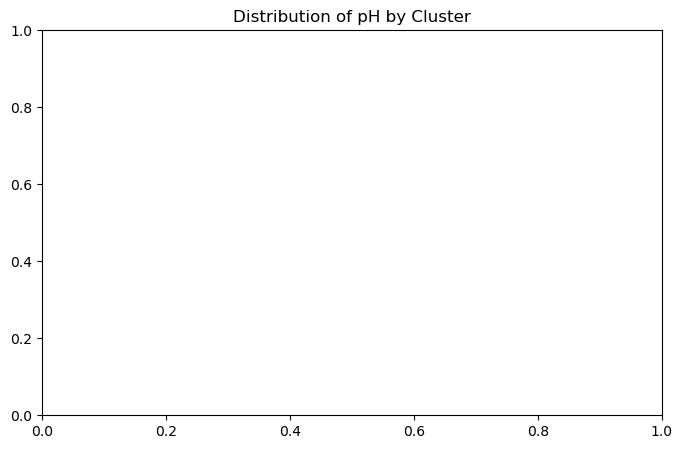

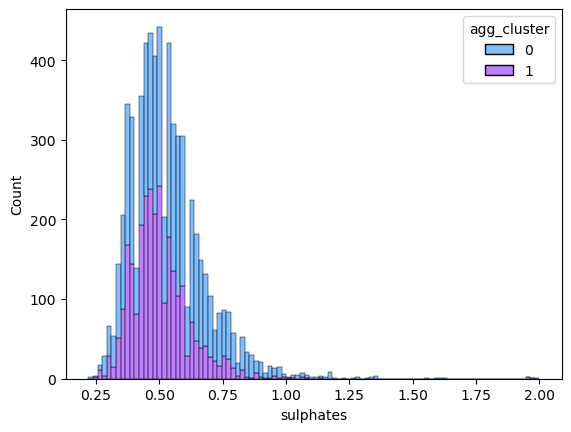

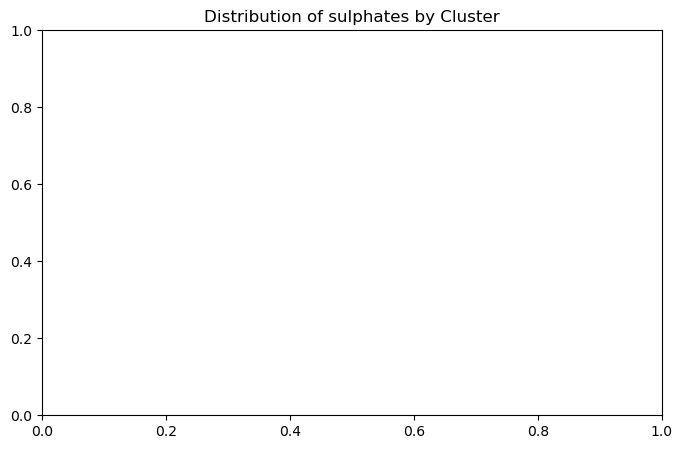

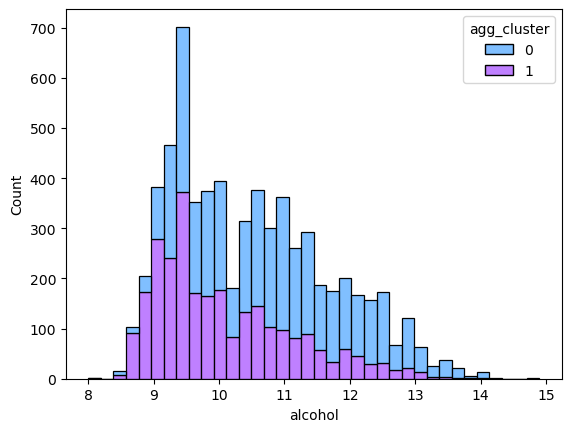

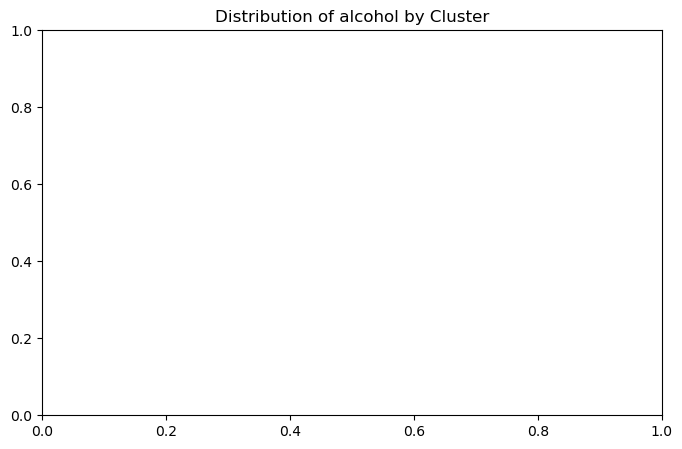

In [185]:
# Step 4: Apply Agglomerative Clustering with optimal k
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')  # Using optimal_k
wine_data['agg_cluster'] = agg_clustering.fit_predict(X)

#Plot the clustering to find the most most discriminatory variables 
for column in X.columns:
    sns.histplot(data=wine_data, x=column, hue='agg_cluster', multiple='stack', palette='cool')
    plt.figure(figsize=(8, 5))
    plt.title(f"Distribution of {column} by Cluster")
    plt.show()

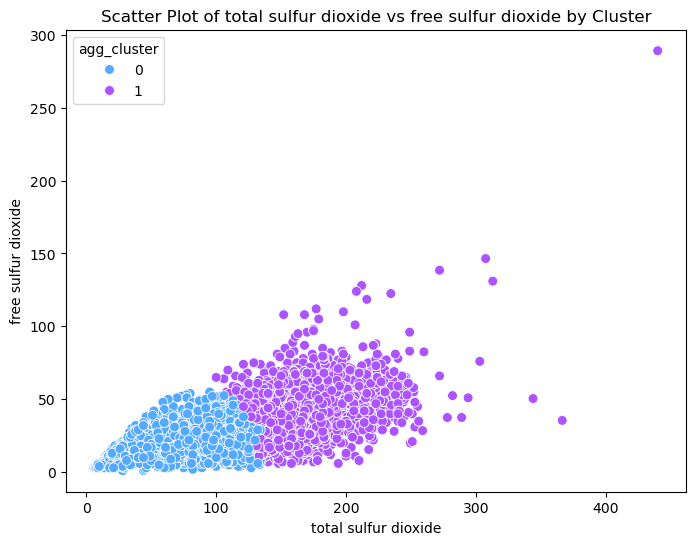

In [182]:
# PLot scatter plot between most discriminatory variables 
most_discriminatory_vars = ['total sulfur dioxide', 'free sulfur dioxide']  # Example variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wine_data, x=most_discriminatory_vars[0], y=most_discriminatory_vars[1], hue='agg_cluster', palette='cool', s=50)
plt.title(f'Scatter Plot of {most_discriminatory_vars[0]} vs {most_discriminatory_vars[1]} by Cluster')
plt.xlabel(most_discriminatory_vars[0])
plt.ylabel(most_discriminatory_vars[1])
plt.show()

**Interpretation:**

  **About the clustering:**  Agglomerative Hierarchical Clustering is a bottom-up method for hierarchical clustering. In this method, each data point is assigned to its own cluster, and as you advance up the hierarchy, pairs of clusters are merged, resulting in a single cluster containing all data points.Hierarchical Clustering does not require the number of clusters to be pre-specified. 

  **Steps followed:**
  
  - We choose the optimal k based on the highest silhouette score. 
  - Then with that create clusterings for each variable and plot it to find the most discriminatory variables
  - We plot the variables in a scatter plot.

   **Observations:**

   - We observe from silhouette score that 2 is the optimal clustering.
   - Then we plot each variable in terms of the clusters and find the best discriminatory variables from that which was total sulphur dioxide and free sulphur dioxide.
   - We plot those two variables in a scatter plot

  **Difference of results between K means cluserting and Hierarchical Clustering**

  - We follow the same steps as we did for k means and in here.
  - Both means of clustering yields the same final result. But the number of clusters are lesser than in k means algorithm.
  - Thus in the final scatter plot we can see only two clusters. But the variables are the same in both k means and hierarchial.

  **Scatter Plot observation:**
  - The scatter plot visualizes the relationship between total sulfur dioxide (x-axis) and free sulfur dioxide (y-axis) for two clusters identified by Agglomerative Clustering.
 - Cluster 0 (Blue): This group represents data points that have relatively lower levels of sulfur dioxide (both total and free sulfur dioxide). These points are mostly clustered together with a mild increase in both variables.
 - Cluster 1 (Purple): This group shows higher levels of sulfur dioxide, particularly in total sulfur dioxide. It contains data points that spread across the range of total sulfur dioxide values, with free sulfur dioxide increasing as total sulfur dioxide rises. This cluster is more dispersed, indicating greater variability in values.


**I confirm that all work submitted is my own and that I have neither given, sought, nor received aid in relation to this assignment.**